<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# What to expect in this chapter

# 1 Some nomenclature

# 2 Comparing the two ‘dialects’

In [1]:
import numpy as np

In [2]:
x=np.linspace(-np.pi, np.pi,num=100)
cos_x=np.cos(x)
sin_x=np.sin(x)

### pyplot Interface

In [39]:
from matplotlib import pyplot as plt

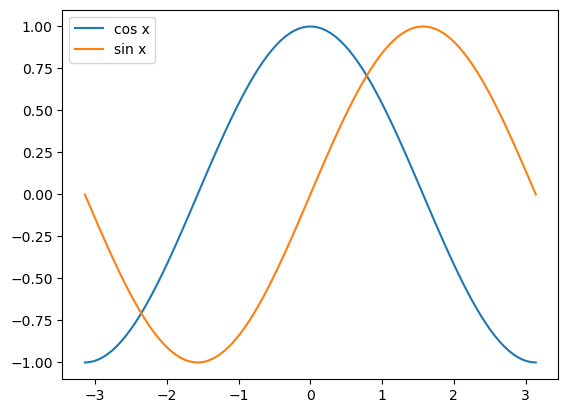

In [4]:
plt.plot(x,cos_x,label='cos x')
plt.plot(x,sin_x,label='sin x')
plt.legend()

### OO Interface

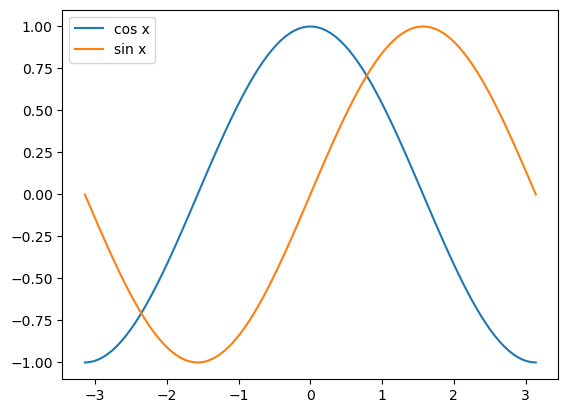

In [6]:
fig, ax=plt.subplots(nrows=1,ncols=1)   # use subplots to create figure and axis
ax.plot(x,cos_x,label='cos x')
ax.plot(x,sin_x,label='sin x')
ax.legend()

# 3 What is OO ax, really?

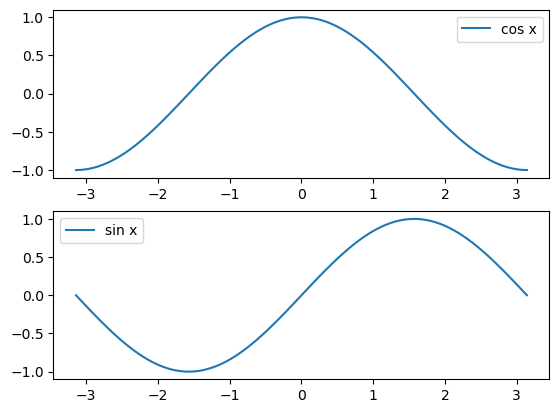

In [8]:
fig, ax=plt.subplots(nrows=2,ncols=1)   # subplot is the function
                                        # nrows is 2 rows of subplots
                                        # ncols is 1 column of subplots
                                        # function returns a fig and an ax (array of axes)

ax[0].plot(x,cos_x,label='cos x') # first subplot in the ax array
ax[1].plot(x,sin_x,label='sin x') # second subplot

ax[0].legend()      # adds a legend to each subplot
ax[1].legend()

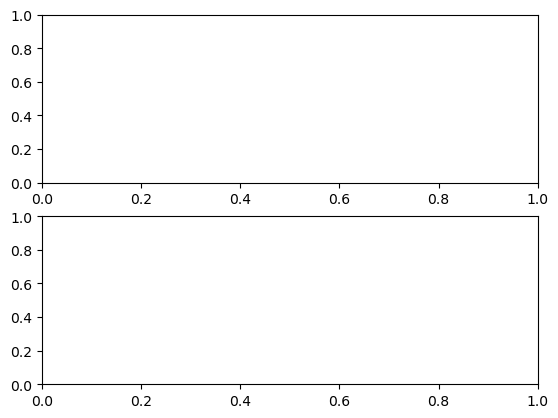

In [9]:
fig, ax=plt.subplots(ncols=1, nrows=2)

In [13]:
type(ax)    # class is given

numpy.ndarray

In [12]:
ax.shape # ax has 2 things

(2,)

In [14]:
type(ax[0]) 

matplotlib.axes._axes.Axes

# 4 A complete OO example

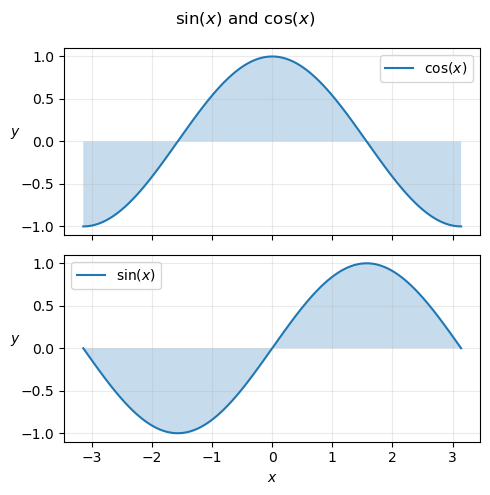

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 5),      # fig size
                       sharex=True)     # share x axis

ax[0].plot(x, cos_x, label=r'$\cos(x)$')    # ax is np.array with 2 axes so index via 0 and 1
ax[0].fill_between(x, 0, cos_x, alpha=.25)  # fill_between() to fill plots
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:                            # draw legends using for loop cos it iterates through items in ax
    a.legend()
    a.grid(alpha=.25)                   # add a grid to each plot and 
    a.set_ylabel('$y$', rotation=0)     # set label

ax[1].set_xlabel('$x$')                 # label lowest plot cos x-axis is shared

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')    # super title to figure
fig.tight_layout()                          # matplotlibmakes adjustment to layout 

# 5 Multiple rows and columns

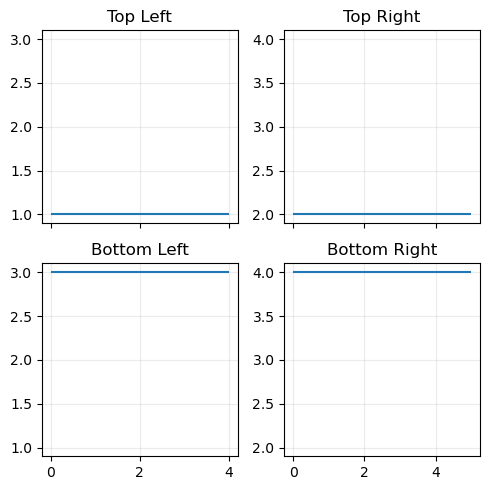

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

### Using ax

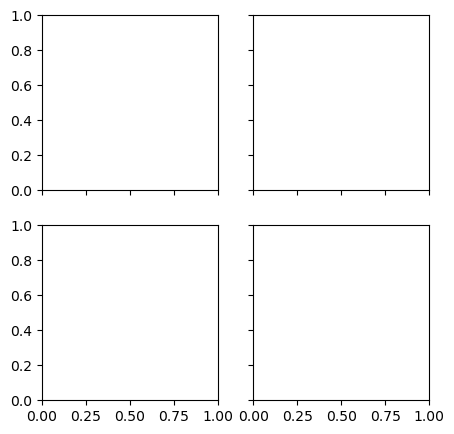

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='row')

In [19]:
ax.shape

(2, 2)

In [23]:
ax[0, 0].set_title('Top Left')  # requires tweaking each axis separately
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right')

Text(0.5, 1.0, 'Bottom Right')

In [21]:
top_left=ax[0, 0]
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]

In [24]:
top_left, top_right, bottom_left, bottom_right = ax.flatten()
# flatten takes 2D array and makes it 1D

In [25]:
top_left.hlines(y=1, xmin=0, xmax=5)        # draw lines
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=5)
bottom_right.hlines(y=4, xmin=0, xmax=5)

## 5.1 Sharing axes

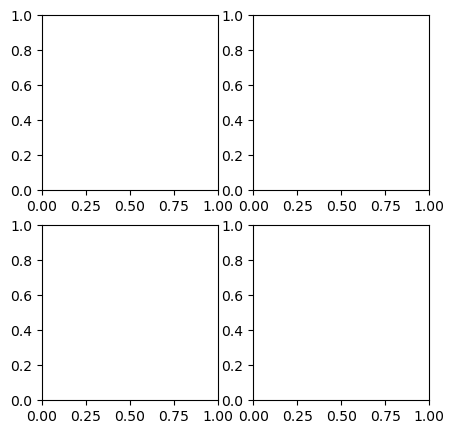

In [27]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5)
)

share axes. 3 ways:
- True: Makes all the axes use the same range
- col: Use the same range for all the columns
- row: Use the same range for all the rows

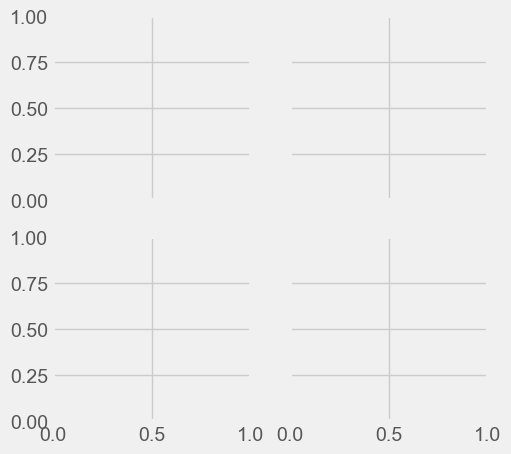

In [40]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex=True, sharey='row'
)

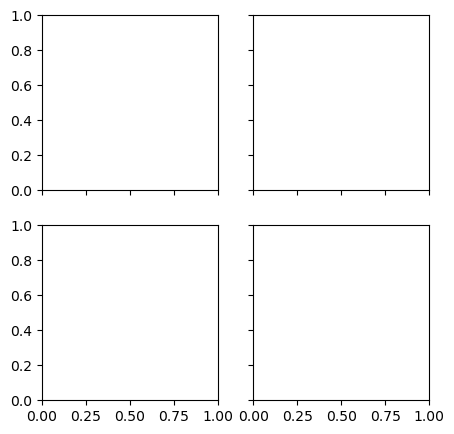

In [29]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex='col', sharey='row'
)

## 5.2 Accessing all axes

In [30]:
top_left.grid(alpha=.25)        # apply changes to all axes
top_right.grid(alpha=.25)
bottom_left.grid(alpha=.25)
bottom_right.grid(alpha=.25)

In [31]:
for a in ax.flatten():
    a.grid(alpha=.25)

# 6 Other useful plots

## 6.1 Histograms

### Data

All: [sg-gov-graduate-employment-survey basic monthly mean all.csv](https://sps.nus.edu.sg/python/docs/python_basics/07_plotting/sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv)

NUS only: [sg-gov-graduate-employment-survey basic monthly mean nus.csv](https://sps.nus.edu.sg/python/docs/python_basics/07_plotting/sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv)

### A quick helper function

In [49]:
def get_plot_data():
    data = {}           # absolute file path (from user to folder to file name)
    filename = "/Users/Tan Xiu Lin/Downloads/sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv"
    data['All'] = np.loadtxt(filename, skiprows=1)

    filename = "/Users/Tan Xiu Lin/Downloads/sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv"
    data['NUS'] = np.loadtxt(filename, skiprows=1)

    return data

print(get_plot_data())

{'All': array([2741., 3057., 3098., 2960., 3404., 2740., 3065., 3350., 3933.,
       3277., 3266., 4106., 3007., 2961., 2839., 2823., 3245., 3140.,
       3592., 3286., 2940., 3153., 3330., 3036., 3155., 4922., 4406.,
       2687., 2896., 2850., 2726., 3101., 3473., 2719., 3141., 3192.,
       3234., 3979., 2836., 3350., 3107., 3729., 3183., 3684., 4054.,
       4290., 2600., 3089., 2931., 2966., 3277., 3212., 3674., 3306.,
       3375., 3250., 3591., 3054., 3160., 5027., 4404., 2976., 3123.,
       2760., 2804., 3224., 3467., 2839., 3266., 3317., 3164., 4173.,
       2817., 3547., 3230., 3847., 3255., 3597., 4053., 4054., 2907.,
       2989., 3146., 3256., 3400., 3300., 4119., 3452., 3768., 3318.,
       3624., 3121., 3279., 4866., 4352., 3175., 3219., 3244., 3203.,
       2859., 3245., 3431., 3400., 2971., 3258., 3341., 4173., 3314.,
       3414., 3402., 3884., 3669., 3549., 3432., 3788., 3381., 3470.,
       4844., 2905., 2895., 3331., 3500., 3232., 4126., 2977., 3435.,
       4320.

### The histogram

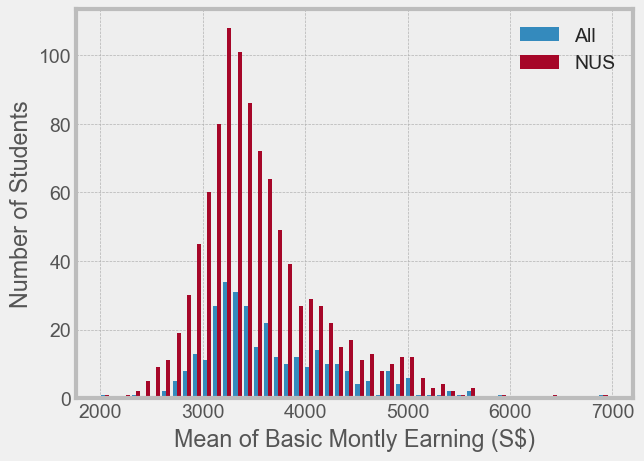

In [45]:
plt.style.use('bmh')
data = get_plot_data()

# bins specifies how many bins to split the data
plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()

## 6.2 Scatter plots

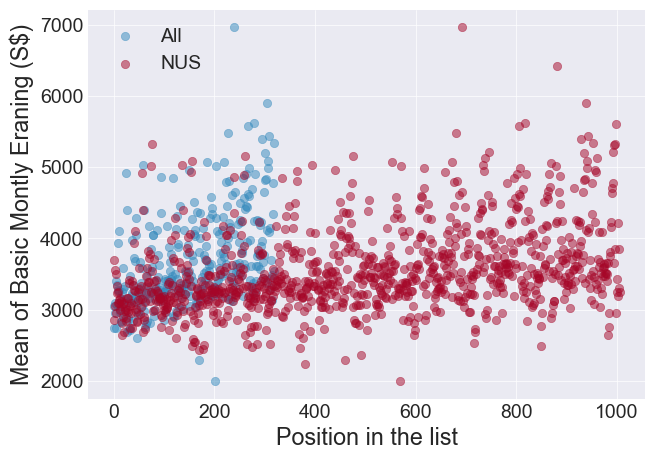

In [46]:
plt.style.use("seaborn-v0_8-darkgrid")

data = get_plot_data()

for label, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Eraning (S$)')
plt.legend()

## 6.3 Bar charts

Text(0, 0.5, 'Number of Students')

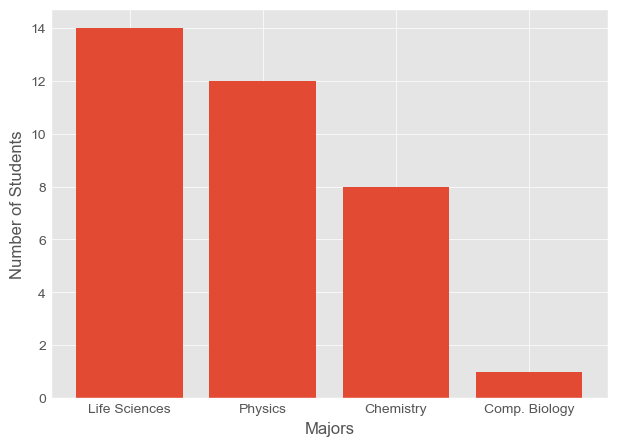

In [47]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors, numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')

## 6.4 Pie charts

Text(0.5, 1.0, 'Percentage of each major')

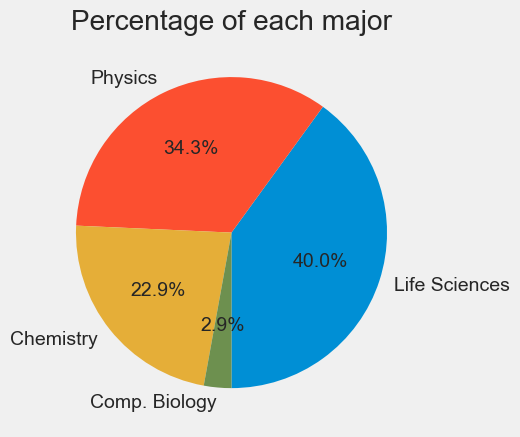

In [48]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90                
        )
plt.title('Percentage of each major')